<h1 align='center'> Time Series Data Visualization </h1>


In this section, I will be exploring different functionalities avaiable in pandas that we can leverage to plot time series data. 

## Contents

- Plotting
- Adding title
- Adding axis label
- X limits
    - X limit by slice
    - X limit by argument
- Color and Style
- X ticks
    - Spacing
    - Date formatting
- Major vs Minor axis values
- Gridlines

## Load the data

For illustration purpose I will be using `Superstore sales` data. It has around `21` columns, I will be using only 3 columns namely `Order Date`, `Sales` and `Profit` of `Category` furniture for plotting and all.

In [17]:
import pandas as pd

# Use the full path to the Excel file
df = pd.read_excel(r"C:\Users\LENOVO\Downloads\TIME SERIES ANALYSIS\Superstore_Sales_Records.xls", index_col='Order Date', parse_dates=True)

# Display the first few rows of the DataFrame
df.head()


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
#select the required cols anf filter over category
df = df[df['Category']=='Furniture']

df = df[['Sales', 'Profit']]

df.head(3)

,Sales,Profit
Order Date,,
2016-11-08,261.9600,41.9136
2016-11-08,731.9400,219.5820
2015-10-11,957.5775,-383.0310


In [21]:
df.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [23]:
#check for min and max Order Date
df.index.min(), df.index.max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [25]:
df.columns

Index(['Sales', 'Profit'], dtype='object')

Convert both column to float data type

In [27]:
df['Profit'] = df['Profit'].astype('float32')
df['Sales'] = df['Sales'].astype('float32')

df.head()

,Sales,Profit
Order Date,,
2016-11-08,261.959991,41.913601
2016-11-08,731.940002,219.582001
2015-10-11,957.577515,-383.031006
2014-06-09,48.860001,14.169400
2014-06-09,1706.183960,85.309196


In [29]:
df.dtypes

Sales     float32
Profit    float32
dtype: object

Group the data over `Order Date` because we might have multiple furniture sales and profit values on same day. We can group the values over each day to get the cumulative sales and profit values per day.

In [31]:
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})

df = df.sort_index()

df.head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21524\2171269981.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})


,Sales,Profit
Order Date,,
2014-01-06,2573.820068,746.407776
2014-01-07,76.727997,-53.709599
2014-01-10,51.939999,21.295401
2014-01-11,9.940000,3.081400
2014-01-13,879.938965,91.279800


Data seems on daily frequency and we have data over span of 3 years that is we have too much points and it gonna bit harder to visualize the data. We can resample the data on month level to make it less granular and to get neat visualization.

In [33]:
df = df.resample('MS').sum()

df.head()

,Sales,Profit
Order Date,,
2014-01-01,6242.524902,805.466492
2014-02-01,1839.658081,120.691711
2014-03-01,14573.956055,-1128.655029
2014-04-01,7944.836914,554.380066
2014-05-01,6912.787109,-349.877625


## Plotting

Let's create a line plot that put both `Sales` and `Profit` data on the same graph. 

<Axes: xlabel='Order Date'>

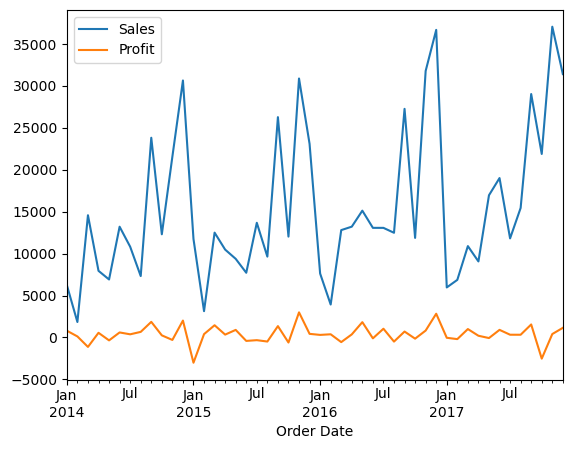

In [35]:
df.plot()

<Axes: xlabel='Order Date'>

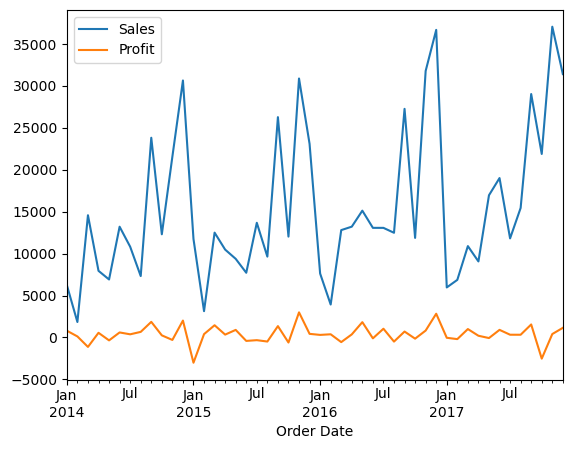

In [37]:
df.plot.line()

This seems messy bacause `Sales` and `Profit` have different scales. 

Plot the both faetures seperately.

<Axes: xlabel='Order Date'>

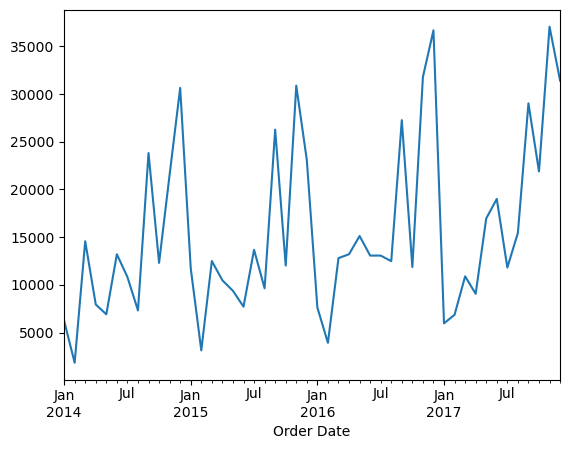

In [39]:
df['Sales'].plot()

<Axes: xlabel='Order Date'>

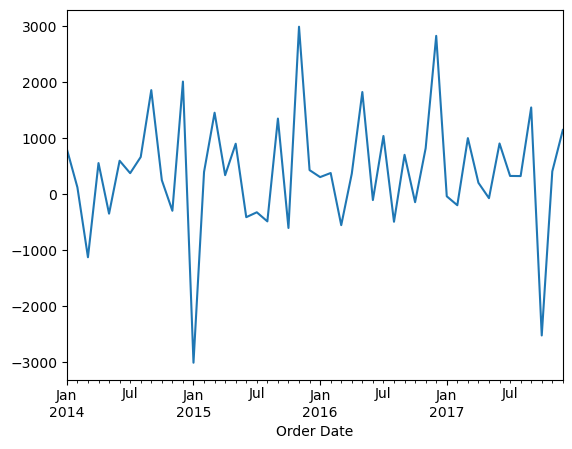

In [41]:
df['Profit'].plot()

It's much better now.

If you look at the graph only it is not much informative like we don't have information about what this graph depicts, and about x values and y values. 

We can do plot formatting to add some usefull information with graphs.

## Plot formatting

### Adding title

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

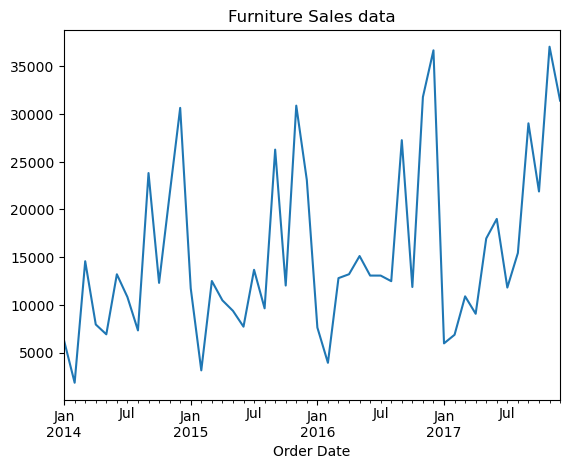

In [43]:
#define title
title = "Furniture Sales data"

df['Sales'].plot(title=title)

We just added a nice title in our graph.

### Figure size

We can make the above graph bigger in shape or smaller in shape. For resizing we can pass `figsize` parameter in `plot` method.

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

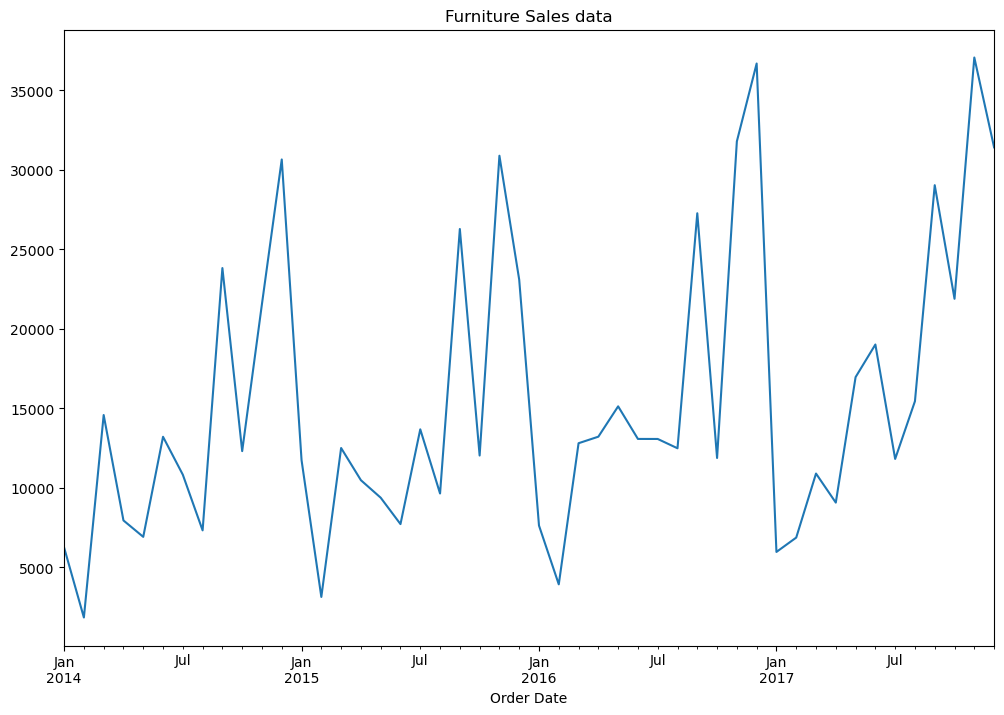

In [45]:
#set figsize 

figsize = (12, 8) #(height, width)
df['Sales'].plot(title=title, figsize=figsize)

Okay, this is bigger in shape and it might helps in visulaizing data with much clarity.

### Axis labels

We can also put labels on x-axis and y-axis and it gonna help in knowing what the above graph depicts actually.

Here we can't pass x and y-axis labels as input to plot method as we did while setting title. `.plot()` returns `matplotlib.axes.AxesSubplot` object, we can set x and y-axis label on that object as long as we do it in same jupyter notebook. 

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Furniture Sales')]

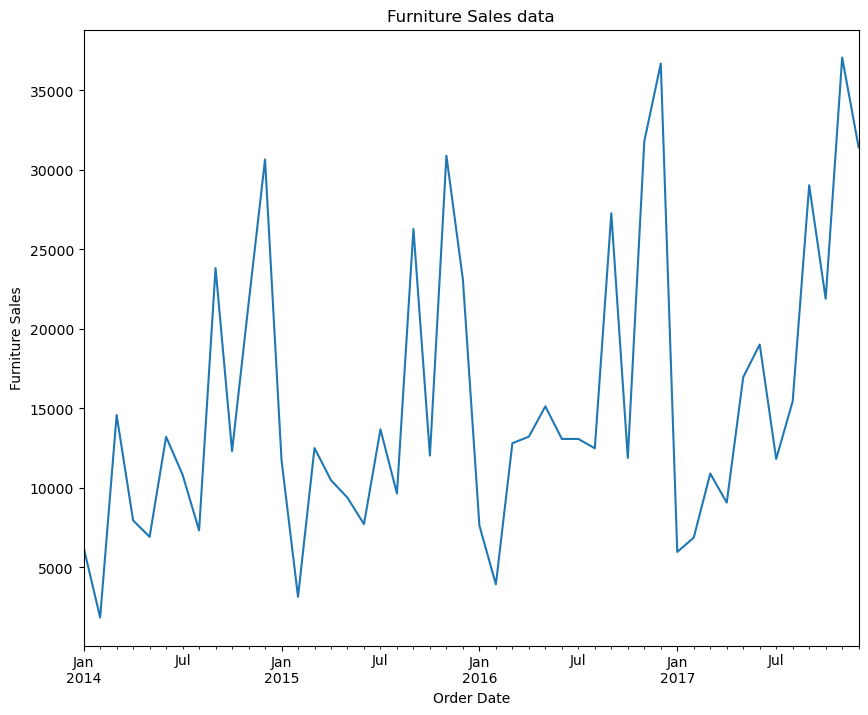

In [47]:
x_label = 'Order Date'
y_label = 'Furniture Sales'

ax = df['Sales'].plot(title=title, figsize=(10, 8))
ax.set(xlabel=x_label, ylabel=y_label)

From `x-label` and `y-label` we can infer the above graph represents *furniture sales* vs *Order Date*

## X Limits

There are two ways we can et a specific span of time as an z-axis limit. we can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>

Both methods have their own benefits:

- In slicing, pandas automatically adjusts the y-limits accordingly.
- In passing in arguments, pandas automatically tighten the x-axis and in case we are setting y-limits then it can imporve the readability.

### X Limits by slice

Take the sales data of only `2016` and plot the graph


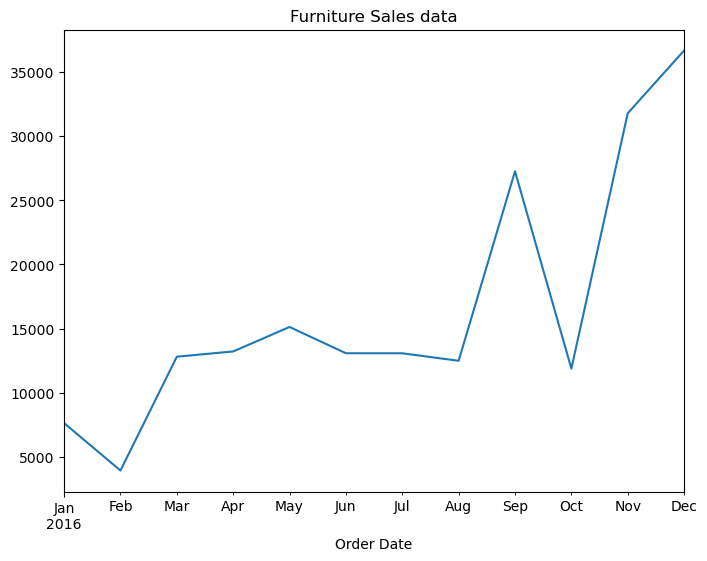

In [49]:
df['Sales']['2016-01-01':'2016-12-01'].plot(title=title, figsize=(8, 6)).autoscale(axis='x', tight=True)

### X Limit as a argument

Instaed of taking slice of original data and then using it for plotting, we can pass `xlim` and its value to <tt>plot()</tt> method directly.

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

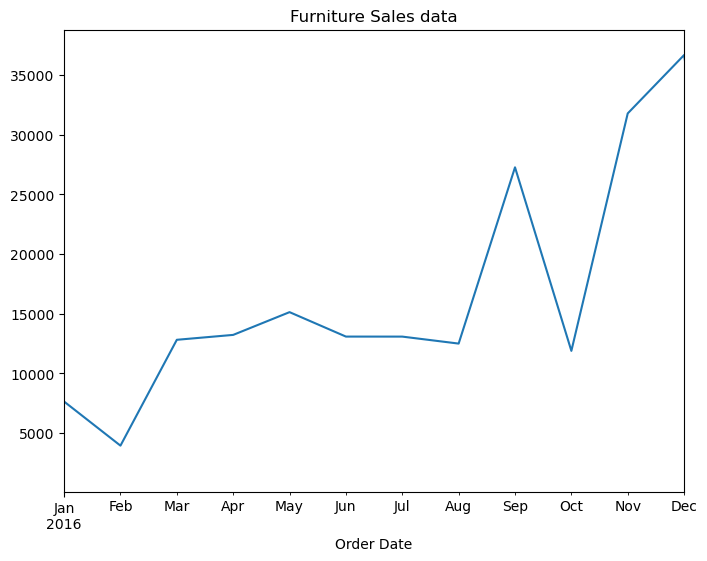

In [51]:
df['Sales'].plot(figsize=(8, 6), title=title, xlim=['2016-01-01', '2016-12-01'])

In both ways we achieved same plot.

Anothet advantage of slice over argument is like sometime it is much easier to type for example:

<tt>df['col']['2016-01-01':].plot()</tt> is easier to type than <tt>df['col'].plot(xlim=('2016-01-01', df.index.max()))</tt>

### Y limit

For the above data range i.e `2016-01-01` to `2016-12-01`, let's see what is lower and upper bound of y-values.


In [53]:
y_min = df['Sales']['2016-01-01':'2016-12-01'].min()
y_max = df['Sales']['2016-01-01':'2016-12-01'].max()

print(f"Lowest values {y_min} and Highest values {y_max}")

Lowest values 3925.551025390625 and Highest values 36678.71484375


Plot the above graph again but this time put limit over y-values as *(3925, 36679)*

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

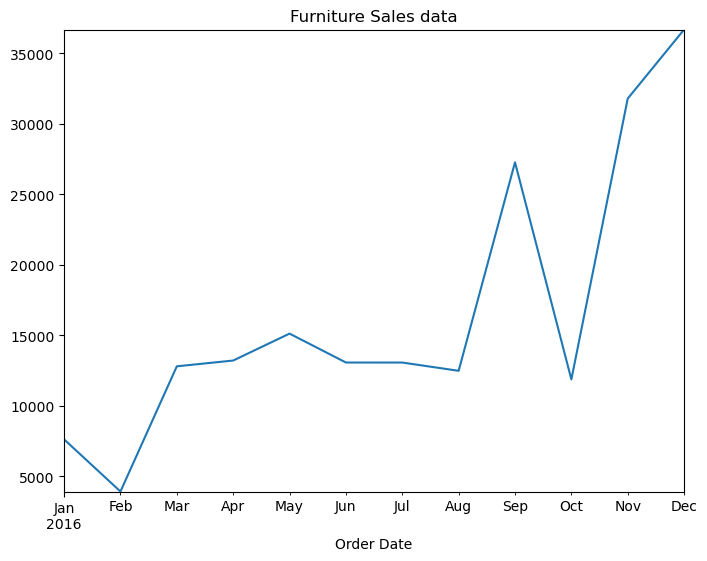

In [55]:
df['Sales']['2016-01-01':'2016-12-01'].plot(figsize=(8, 6), title=title, ylim=[3925, 36679])

**Note** Setting to narrow y values may make graphs appear overly volatile. In the above graph it seems the sales is increasing over time.

Let's change the y-axis limit and make it much wider.

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

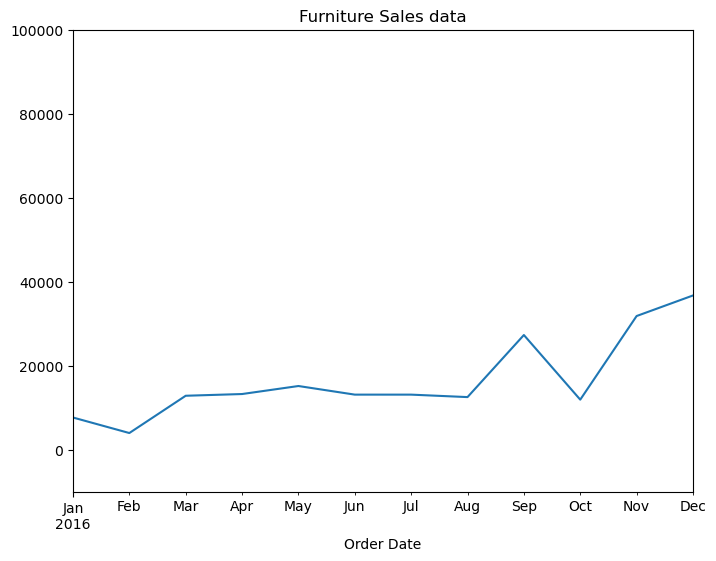

In [57]:
df['Sales']['2016-01-01':'2016-12-01'].plot(figsize=(8, 6), title=title, ylim=[-10000, 100000])

Now it seems somewhat flat. So be carefull while setting y-axis limits and look at range of y-values first.

**Note that** <tt>ax.autoscale(axis='both', tight=True)</tt> is unnecessary if axis limits have been passed into `.plot()` method.

## Color and Style

We can pass arguments into `.plot()` to change the linestyle and color.

<Axes: title={'center': 'Furniture Sales data'}, xlabel='Order Date'>

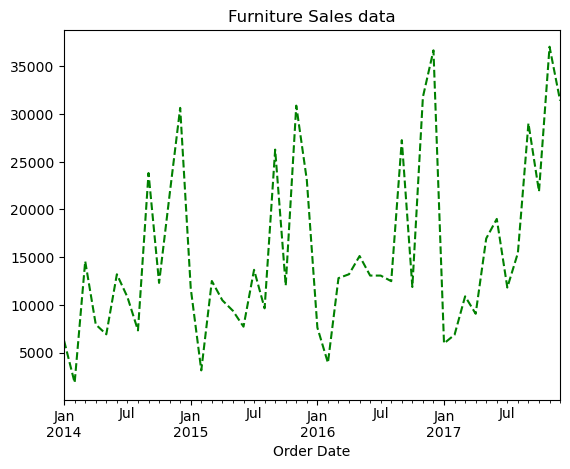

In [59]:
df['Sales'].plot(title=title, ls='--', c='g')

In the above plot we changed the line style and color of the line. 

## X Ticks

We can also change the format and appearance of dates along x-axis. We can use `dates` from `matplotlib` module.

In [61]:
from matplotlib import dates

### Set the spacing

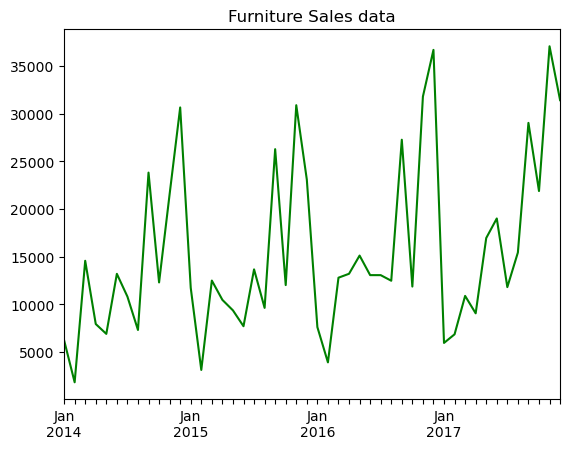

In [63]:
ax = df['Sales'].plot(title=title, ls='-', c='g')

#remove the default `Data` label
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday=0))

Note that the dates are now seperated one month apart. And it starts from January i.e `bymonthday=0`

### Date formatting

Formatting follows the Python datetime <strong> <a href='http://strftime.org'>strftime</a> </strong> codes.

In [65]:
from datetime import datetime

datetime(2023, 8, 20, 0, 0, 0).strftime("%A, %B %d, %Y %I:%M%S %p")

'Sunday, August 20, 2023 12:0000 AM'

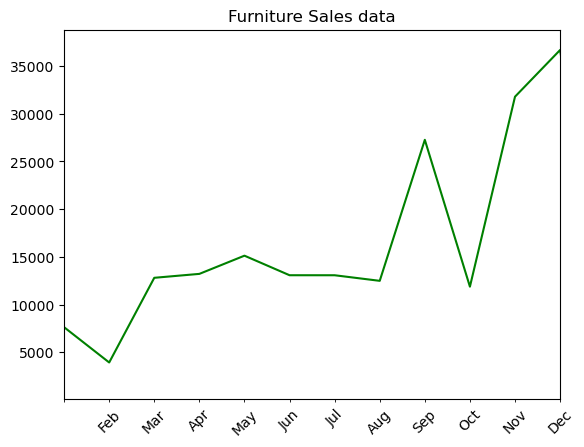

In [67]:
ax = df['Sales'].plot(title=title, ls='-', c='g', xlim=['2016-01-01', '2016-12-01'], rot=45)

#remove the default `Data` label
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.YearLocator())

ax.xaxis.set_major_formatter(dates.DateFormatter("%a"))


### Major vs Minor axis values

All the ticks marks we assigned above belonges to the major axis. We can assign another level called the *minor axis*, perhaps to seperate month names from days of the month.

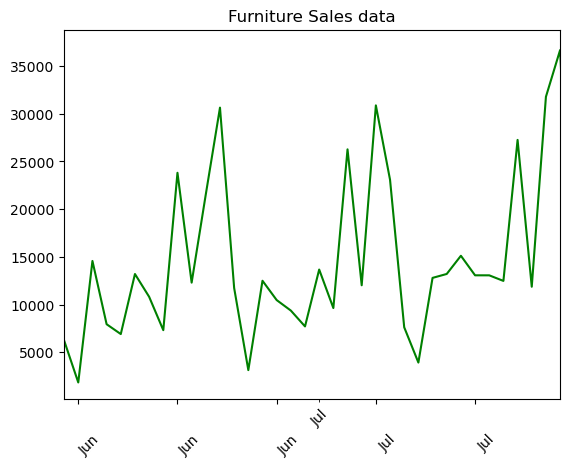

In [69]:
ax = df['Sales'].plot(title=title, ls='-', c='g', xlim=['2014-01-01', '2016-12-01'], rot=45)

#remove the default `Data` label
ax.set(xlabel='')

#major axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

#set minor axis
ax.xaxis.set_minor_locator(dates.MonthLocator())

ax.xaxis.set_major_formatter(dates.DateFormatter("\n\n%b"))


## Adding Grid Lines

We can add x and y axis gridlines that extend into the plot from each major tick mark.

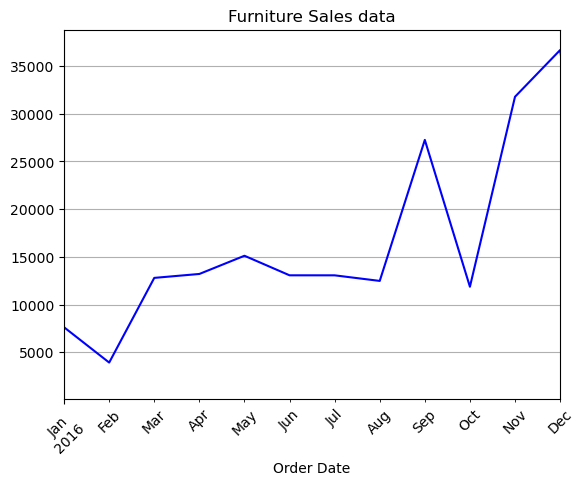

In [71]:
ax = df['Sales'].plot(title=title, ls='-', c='b', xlim=['2016-01-01', '2016-12-01'], rot=45)

#add grid lines

ax.xaxis.grid(True)
ax.yaxis.grid(True)